# Programmieraufgaben zur 1. Sonderübung
## Aufgabe 1 f
#### Hintergrund und Daten:

Wir werden die in Aufgabe 1 a und 1 c definierten Modelle auf den Datensatz <i>WorldPopulation.csv</i> anwenden. In diesem Datensatz befinden sich die jährliche Angabe der Weltbevölkerung von 1800 bis 2020.

Wir laden zunächst den Datensatz mithilfe von <i>pandas</i>.

In [6]:
import pandas as pd
import numpy as np
import time
df = pd.read_csv('WorldPopulation.csv', sep=",", index_col=0)
df.tail()

,Year,Population
216,2016.0,7.417009e+09
217,2017.0,7.510123e+09
218,2018.0,7.590388e+09
219,2019.0,7.674427e+09
220,2020.0,7.756509e+09


Für die weitere Bearbeitung speichern wir die Spalten als <i>numpy-Vektoren</i> ab.

In [2]:
import numpy as np

x = df.iloc[:,0].to_numpy()
y = df.iloc[:,1].to_numpy()

Im Vektor x stehen die Jahreszahlen und im Vektor y die absolute Weltbevölkerung.

Berechnen Sie die Lösung von $LS_a$ auf diesem Datensatz und geben Sie die gefundenen Parameter aus. (1 Punkt)  

In [3]:
X = np.ones((221,2))
for i in range(221):
    X[i,1] = x[i]
b_log = np.linalg.inv(np.transpose(X) @ (X)) @ (np.transpose(X) @ np.log(y))

In [4]:
b = np.e ** (b_log)
b

array([43.87661805,  1.00930858])

Plotten Sie den realen Datensatz und die exponentielle Kurve, die durch die berechneten Parameter definiert wird, in eine Abbildung. (1 Punkt)

In [5]:
from matplotlib import pyplot as plt

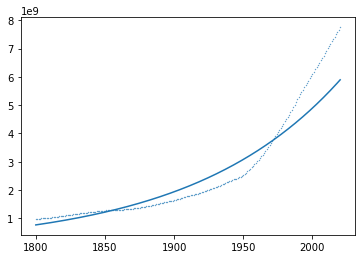

In [6]:
x_p1 = np.linspace(1800,2020,10000)
plt.plot(x_p1,b[0] * b[1] ** (x_p1))
plt.scatter(x,y, s = 0.1)
plt.show()

Berechnen Sie die Lösung von $LS_b$ auf diesem Datensatz und geben Sie die gefundenen Parameter aus. (1 Punkte) 

In [7]:
x_2 = x**2
X_b = np.ones((221,3))
for i in range (221):
    X_b[i,1] = x[i]
    X_b[i,2] = x_2[i]
###b berechnen
b_log2 = np.linalg.inv(np.transpose(X_b) @ (X_b)) @ (np.transpose(X_b) @ np.log(y))
b_2 = np.e ** (b_log2)
b_2

array([2.27884023e+69, 8.57113842e-01, 1.00004279e+00])

Plotten Sie den realen Datensatz und die exponentielle Kurve, die durch die berechneten Parameter definiert wird, in eine Abbildung. (1 Punkt)

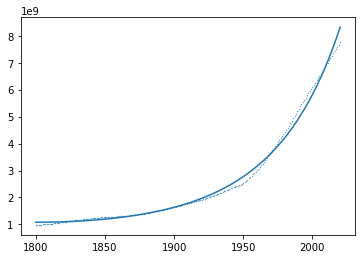

In [8]:
x_p1 = np.linspace(1800,2020,10000)
plt.plot(x_p1,b_2[0] * b_2[1] ** (x_p1) * b_2[2]** (x_p1**2))
plt.scatter(x,y, s = 0.1)
plt.show()

## Aufgabe 2 b
#### Der Datensatz

Für diese Aufgabe sind die Dateien

- <i>Standort_Messdaten.npz</i>
- <i>plot_Standort.py</i>

relevant. Sie können die Problemdatn mit dem Befehl

In [7]:
data = np.load('Standort_Messdaten.npz')
S = data['S']
u = data['u']

laden. In den Spalten der $2\times 5$-Matrix $S$ stehen die Standorte $s^1,...,s^5\in\mathbb{R}^2$ der fünf Sensoren und $u\in\mathbb{R}^5$ ist der Vektor der fehlerbehafteten Abstandsmessungen der fünf Sensoren. 

#### Ergebnis plotten

Die Python-Datei <b>plot_Standort.py</b> kann mit

In [8]:
from plot_Standort import *

eingebunden werden. Eine beispielhafte Schätzung des Standortes der Quelle $x_{prediction}=(-10,-10)^\intercal$ kann dann mit dem Befehl

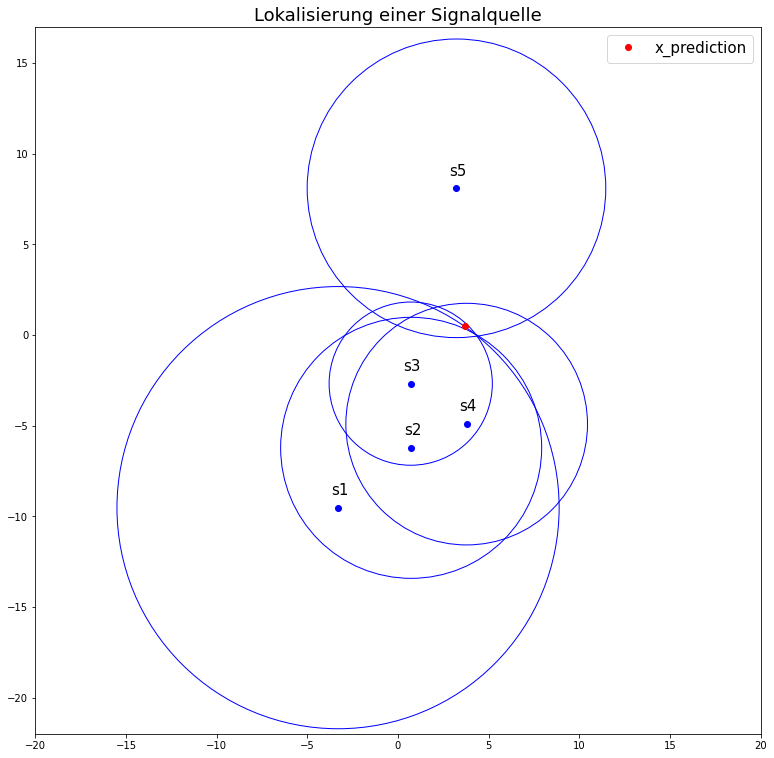

In [19]:
x_pred = np.array(x_crit) 
plot_Standort(x_pred, S, u)

visualisiert werden. In diesem Plot werden außerdem die Standorte der Sensoren sowie deren fehlerbehaftete Abstandsmessungen dargestellt. 

Im Folgenden wird knapp beschrieben, welche Funktionen Sie implementieren müssen.

### Zielfunktion

Diese Funktionen sollen für ein beliebiges $x\in\mathbb{R}^2$ und Parameter $S\in\mathbb{R}^{2\times 5}$ und $u\in\mathbb{R}^5$ den Zielfunktionswert $h(x)$ (<b>h_val</b>) und den Gradienten $\nabla h(x)$ (<b>h_grad</b>) zurückgeben.

In [9]:
def h_value(x, S, u):
    
    """ objective function in source location problem
    
    Parameters
    ----------
    
    x: ndarray, shape (2,)
        Input argument to h (variable)
        
    S: ndarray, shape (2,5)
        nxm-matrix of sensor locations
        one column for each sensor (data)
    
    u: ndarray, shape (5,)
        m-dim. vector of distances (data)
        
    Returns
    -------
    
    value: float
        function value of h at x
    
    """
    
    # Ergänzen Sie hier Ihren Code
    h = 0
    for i in range(5):
        h += ((x[0] - S[0,i])**2 + (x[1] - S[1,i])**2 - u[i]**2)**2
    value = h
    return value


In [10]:
def h_gradient(x, S, u):
    
    """ gradient of objective function in source location problem
    
    Parameters
    ----------
    
    x: ndarray, shape (2,)
        Input argument to h (variable)
        
    S: ndarray, shape (2,5)
        nxm-matrix of sensor locations
        one column for each sensor (data)
    
    u: ndarray, shape (5,)
        m-dim. vector of distances (data)
        
        
    Returns
    -------
    
    grad: ndarray, shape (2,)
        gradient (with respect to x) of h at x
    
    """
    grad = np.zeros(2)
    for i in range(5):
        grad[0] += 4 * (x[0] - S[0,i]) * ((x[0] - S[0,i])**2 + (x[1] - S[1,i])**2 - u[i]**2)
        grad[1] += 4 * (x[1] - S[1,i]) * ((x[0] - S[0,i])**2 + (x[1] - S[1,i])**2 - u[i]**2)
    
    return grad


### Armijo-Schrittweitensteuerung

Orientieren Sie sich für Ihre Implementierung der Armijo-Schrittweitensteuerung an der folgenden Vorgabe:

In [11]:
def armijo(x, d, obj_fun, sigma, rho, gamma):
    
    """ Armijo stepzise for gradient descent
    
    Parameters
    ----------
    
    x: ndarray
        Current iterate of the optimization algorithm.
        
    d: ndarray
        Search direction.
    
    obj_fun: callable
        Objective function to be mimimized. Returns a number.
       
    sigma: float
        Parameter that determines flatness of damped tangent. (0<sigma<1)
    
    rho: float
        Parameter that determines how fast stepsize is decreaded. (0<rho<1)
        
    gamma: float
        Parameter that determines appropriate starting stepsize.
        
        
    Returns
    -------
    
    t: float
        Armijo stepsize.
    
    """
    
    f_value = obj_fun(x) # Funktionswert am Punkt x auswerten
    t =  gamma  # Start-Schrittweite (t_0 in Algorithmus 2.4)
    x_trial = x + t * d # Schritt in Richtung d mit Schrittweite t
    f_trial = obj_fun(x_trial) # Funktionswert am Punkt x_trial
    while f_trial > (f_value - t * sigma * (np.linalg.norm(d)**2)): # Abbruchkriterium ergänzen:
        t = rho * t # Schrittweite updaten
        x_trial = x + t * d # Schritt in Richtung d mit neuer Schrittweite t
        
        f_trial = obj_fun(x_trial) # Funktionswert am neuen Punkt x_trial
        
    if np.linalg.norm(t*d) < 10**(-14):
        t = 10**(-7)
        
    return t

Die "if-Bedingung" in der obigen Implementierung der Armijo-Regel taucht in Algorithmus 2.4 im Buch nicht auf und ist aus theoretischer Sicht nicht notwendig. In dieser Sonderübung verhindern wir damit, dass der Algorithmus eine zu kleine Schrittweite zurückliefert.

### Gradientenverfahren

Ihre Implementierung des Gradientenverfahrens (Algorithmus 2.5 im Buch) soll den Namen <b>gradientDescent</b> haben und folgendermaßen aufgerufen werden können:

In [16]:
x_crit, h_crit, k, runtime = gradientDescent(h_val, h_grad, armijo_rule, x_0, tol)

Für diesen Aufruf müssen zuvor die Funktionen <b>h_val</b> und <b>h_grad</b> definiert worden sein. Diese Funktionen sollen für die aktuelle Iterierte den Zielfunktionswert bzw. den Gradienten der Zielfunktion zurückliefern. Unter Verwendung der "Lambda-Notation" definieren Sie also

In [12]:
h_val = lambda x: h_value(x, S, u)
h_grad = lambda x: h_gradient(x, S, u)

Ebenfalls vor dem Aufruf der Funktion <b>gradientDescent</b> müssen noch eine Funktion für die korrekte Schrittweitensteuerung

In [13]:
sigma = 0.2
rho = 0.5
gamma = 2
armijo_rule = lambda x, d: armijo(x, d, h_val, sigma, rho, gamma)

sowie die noch fehlenden Parameter

In [14]:
tol = 1e-4 
x_0 = np.zeros(2)

definiert werden.

Orientieren Sie sich für Ihre Implementierung des Gradientenverfahrens an der folgenden Vorgabe:

In [15]:
def gradientDescent(obj_fun , grad_fun , line_search, x_0, epsilon):

    """ classical gradient descent
    
    Input
    ----------
    
    obj_fun: callable
        Objective function to be mimimized.
            Input: ndarray, 
            Output: float
        
    grad_fun: callable
        Gradient of objective function.
            Input: ndarray, 
            Output: ndarray, 
    
    line_search: callable
        Line-search procedure to be used in the algorithm.
            Input: x: ndarray
                    Starting point of the method.
                   d: ndarray
                    Starting direction of the method (negative gradient). 
            Output: float
        
    x_0: ndarray
        Starting point of the method.
       
    epsilon: float
        Tolerance for the termination of the method.
        
        
    Output
    -------
    
    x_crit: ndarray
        Approx. of a critical point of the objective function.
    
    f_crit: float
        Objective value at x_opt
        
    k: int
        Number of iterations.
        
    runtime: float
        Runtime of the algorithm.
    
    """
    
    start_time = time.time()
    k = 0
    x = x_0
    f_grad = grad_fun(x) # Gradienten von f an x auswerten
    d = -1 * f_grad # Suchrichtung ergänzen
    while (np.linalg.norm(f_grad)) > epsilon: # Abbruchkriterium ergänzen
        t = line_search(x,d) # Schrittweite bestimmen
        x = x + t*d # Update der aktuellen Iterierten
        f_grad = grad_fun(x) # Gradient von f an neuer Iterierter
        d = -1* f_grad # Suchrichtung ergänzen
        k += 1
    x_crit = x # Approximation eines kritischen Punktes
    f_crit = obj_fun(x) # Zielfunktionswert an der Approximation
    runtime = time.time() - start_time # Laufzeit des Verfahrens
    return x_crit, f_crit, k, runtime
#

Werden die Funktionen <b>h_val</b>, <b>h_grad</b> und <b>armijo_rule</b> wie oben mit Hilfe der "lambda-Notation" definiert, müssen die Daten $S$ und $u$ nicht extra an das Gradientenverfahren übergeben werden. Die Funktionen können im Gradientenverfahren einfach mit

In [ ]:
obj_func(x)
grad_func(x)
line_search(x, d)

In [18]:
print([x_crit, h_crit, k, runtime])
print(h_val(np.zeros(2)))
print(h_grad(x_crit))

[array([3.69971137, 0.47593368]), 332.442899994688, 48, 0.030748844146728516]
2647.619670453788
[-8.75683643e-06  2.17177284e-05]


aufgerufen werden.